# Final Project: The Billiards Problem

## William Willmon

## Introduction

A billiard ball is a common object used all around the world for competition in the table top game of pool. A billiard ball, usually ranging in diameter from 51 mm to 68 mm, has a trajectory that physicist can model. For the billiard problem, physicist are modelling the trajectory of this ball on a frictionless table and they are observing the chaotic characteristics of the ball as it reflects off the walls. Chaos is a mathematical property of dynamical systems, which the dynamical system is modelled using nonlinear equations of motion. This problem can be seen as chaotic due to the nonlinearities of the collisions with the wall. The physics being observed in this problem is a ball moving without friction on a horizontal tables. In this problem we will also use the law of conservation of momentum to model how a ball will or will not move chaotically about the billiard table. Conservation of the momentum allows us to observe how different tables can affect a balls trajectory and it will be chaotic. 

To determine chaos we analyze a phase space plot of the momentum as a function of position. A phase space plot is a plot of the space that represents all possible states of a system. Often when analyzing the graphs one can determine chaos by the pattern or lack thereof. Another important factor to study is the divergence between two balls in a table with slightly different initial conditions. This divergence pattern can be resembled by the exponential growth that is follows and this is what we call the Lyapunov exponent. The Lyapunov exponent explicitly gives us the rate of exponential divergence from given initial conditions, this divergence from initial conditions is directly correlated to the chaos of a system. Throughout this problem we will change the table in order to see how these graphs are affected by different tables.

## Model 
Two table shapes will be observed, stadium (Fig.1)[1] and elliptical (Fig.2)[2]. The balls on the table roll at a constant velocity in both the x and the y direction where the velocity only changes when the ball collides with the walls of the table. This causes the ball to then reflect off the wall where the angle between the normal vector at that position on wall and the path of the ball both before and after collision is the same, as shown later when talking about the perfect reflection. This collision in this problem is elastic, which means no energy is lost in the reflection off the wall. Thus, the velocity parallel to the wall after the collision is same as the initial and the perpendicular velocity is the opposite as the initial perpendicular velocity. 
    
<img src="stadium001.gif" width="225"/> $\tag {Fig.1}$

Above is a model of a stadium table where a is what we will refer to as $\alpha$ and r is the radius of the semicircle on either end. Below we have an elliptical table where r1 is what will be known as the radial width and r2 is the radial length. 

<img src="ellipse.png" width="225"/> $\tag {Fig.2}$

The model of billiard ball motion is based on Newtonian mechanics, the x and y velocities of the ball between the walls.

$$
\frac{dx}{dt} = v_{x} \tag {Eq.1}
$$

$$
\frac{dy}{dt} = v_{y} \tag {Eq.2}
$$

The bounce of the pool ball off the table wall is simulated by projecting the velocity vector onto the vector normal to the wall and obtain the vector perpendicular to the wall. Once we have the perpendicular, the parallel component of velocity is the total vector minus the perpendicular component

$$
\vec{v}_{i,\perp} = (\vec{v}_{i} \bullet \hat{n})\hat{n} \tag {Eq.3}
$$

$$
\vec{v}_{i,\parallel} = \vec{v}_{i} - \vec{v}_{i,\perp} \tag {Eq.4}
$$

The image below, (Fig.3)[3], is an illustration of projection where the red vector, $\vec{U}$, is $\vec{v}_{i}$, the blue vector, $\vec{V}$, is $\hat{n}$, the green line is $\vec{v}_{i,\perp}$, and finally the purple line is $\vec{v}_{i,\parallel}$. 

<img src="Projection.jpg"> $\tag {Fig.3}$

The final set of equations gives us velocity components after the collision. Since the reflection off the walls is elastic, we use a perfect reflection, the angle between the normal vector and the initial velocity is the same as the angle between the normal vector and the final velocity.

<img src="170px-Reflection_angles.svg.png"> $\tag {Fig.4}$

With that being shown the final perpendicular component is the negative of the initial perpendicular component and the final parallel component is equal to the initial parallel component. Shown above in (Fig.4)[4] is a perfect reflection where the final and initial angles are equal. Using that concept of perfect reflection, the equations below are obtained.

$$
\vec{v}_{f,\perp} = -\vec{v}_{i,\perp} \tag {Eq.5}
$$

$$
\vec{v}_{f,\parallel} = \vec{v}_{i,\parallel} \tag {Eq.6}
$$

Using the equations above, we will be looking at a few different scenarios. The first being the trajectory of the ball in a stadium table. This is a table that is similar to a rectangle but with semi-circles on both ends, and the length, $\alpha$, of the rectangle can be changed. We will then test different shapes of tables such as and ellipse and a rectangle.

The boundary conditions that must be considered are the size and shape of the table that the ball is on, the initial speed of the ball is greater than 0, and the $\alpha $ describing the aspect ratio of the stadium table is greater than or equal to zero.

## Numerical Method

Euler's method is a numerical solution for single-variable ordinary differential equations that have some initial condition. The two differential equations we are solving are (Eq.1) and (Eq.2), for which we will be imputing an initial $x$ and $y$ when $t = 0$. The Taylor expansion allows us to use this numerical method in which we have an initial value, $x(t)$. To find the next value a certain time step away, $\Delta t$, we use the first order of the expansion. 
$$
x(t+\Delta t) = x(t) + \Delta t*f(x,t) \tag{Eq.7}
$$

In this problem, Euler's method is the best numerical method due to the fact that the velocity between walls is linear. Thus, we can say that $v_{x}$ and $v_{y}$ are the $f(x,t)$ used in the Euler's method. We can then use the $\Delta t$ time step to fin the change in $x$ and iterate from our initial condition to the new location. 

After each step, the program determines if the ball passed the wall, if so the program goes to the previous time step and changes the $\Delta t$ to a smaller time. This allows for a better model of the ball bouncing off the wall at a more accurate collision point. With the smaller time step we then reflect the ball off the wall and repeats this process for the new $v_{x}$ and $v_{y}$, change back to the original time step and repeat this process.


In [2]:
import math
import numpy as np
from matplotlib.pylab import plt
from matplotlib.patches import Ellipse
from scipy.optimize import curve_fit
% matplotlib inline

def stadiumtable(radius,alpha,order=1):
    '''Return x and y values for a a stadium table with a width of two times
    the radius and the two semicircles seperated by a length alpha
    
    Argument:
    R - Radius of semicircles at end of table for order 1 and half height 
        for order 2 (m)
    alpha - length of rectangular portion of table for order 1 and length 
            for order 2 (m)
    order(optional) - determines type of table
     
    Returns:
    y_up - upper y values of the table
    y_down - lower y values of the table
    x - x values for the table
    
    Examples:
    >>> vi_perp_para(1,0,order=1)
    Circle of Radius 1
    '''
    y_up = []
    y_down = []
    
    # determine shape of the table
    if order == 1:
        
        # Set the maximum x value of the graph and a list of values to 
        # be given y values
        x_end = 2*radius+alpha
        x = np.linspace(0,x_end,x_end*100)
        
        # Give x values in list the y values for the stadium table
        for i in x:
            if i < radius:
                y_up.append(math.sqrt(radius-(i-radius)**2))
                y_down.append(-1*math.sqrt(radius-(i-radius)**2))
            elif i >= radius and i <= (radius + alpha):
                y_up.append(radius)
                y_down.append(-1*radius)
            elif i > (radius + alpha) and i <= x_end:
                inew  = i - alpha
                y_up.append(math.sqrt(radius-(inew-radius)**2))
                y_down.append(-1*(math.sqrt(radius-(inew-radius)**2)))
    
    elif order == 2:
        
        # Set the maximum x value of the graph and a list of values to 
        # be given y values and declare the half-width and half-length 
        #of the table
        Rx = radius
        Ry = alpha
        x_end = 2*Rx
        x = np.linspace(0,x_end,x_end*100)
        
        # Give x values in list the y values for the elliptical table
        for i in x:
            y_up.append(math.sqrt(Ry**2-(i-Rx)**2*Ry**2/Rx**2))
            y_down.append(-1*math.sqrt(Ry**2-(i-Rx)**2*Ry**2/Rx**2))
                
    return y_up,y_down,x

In [3]:
def billiards(V,theta,Xi,Yi,R,alpha,order=1):
    '''Return x and y points for a billiard ball rolling along a frictionless table 
    and bouncing off the walls. The ball is given initial conditions and based off 
    conditions moves chaotically about the table.
    
    Argument:
    V - inital velocity magnitude (m/s)
    theta - inital angle of velocity from horizontal (rad)
    Xi - initial x value (m)
    Yi - initial y value (m)
    R - Radius of semicircles at end of table or the x radius of ellipse(m)
    alpha - length of rectangular portion of table or the y radius of ellipse(m)
    
    Returns:
    x_points - the x values of the ball over time
    y_points - the y values of the ball over time
    vx - the velocity values in the x direction when y = 0
    x_y0 - the x position of the ball when y = 0
    '''
    # break up initial velocity into x and y components
    Vy = math.sin(theta)*V #m/s
    Vx = math.cos(theta)*V #m/s
    
    # declare initial time step and arrays for necessary values
    dt = 0.01 #s
    x_points = []
    y_points = []
    vx = []
    x_y0 = []
    
    # Runs 100000 iterations to plot trajectory of pool ball
    for i in range(0,100000): 
        
        # Equation for Euler's method
        Xf = dt*Vx + Xi
        Yf = dt*Vy + Yi
        
        # Trajectory for stadium table
        if order == 1:
            # If ball has not left table
            if dt == 0.01:
                
                # Determine if the y is on the table, if so add point to list and continue otherwise
                # continue otherwise change time step to 0.002
                if Xf > R and Xf < (R+alpha):
                    if abs(Yf) < R:
                        x_points.append(Xf)
                        y_points.append(Yf)
                        Xi = Xf
                        Yi = Yf
                        dt = 0.01
                        
                        # Give values for phase space plot
                        if Yf > -0.01 and Yf < 0.01:
                            vx.append(Vx)
                            x_y0.append(Xf)

                    else:
                        dt = 0.002

                elif Xf < R:
                    y = np.sqrt(R-(Xf-math.sqrt(R))**2)

                    if abs(Yf) <= y:
                        x_points.append(Xf)
                        y_points.append(Yf)
                        Xi = Xf
                        Yi = Yf
                        dt = 0.01

                        if Yf > -0.01 and Yf < 0.01:
                            vx.append(Vx)
                            x_y0.append(Xf)

                    else:
                        dt = 0.002
                elif Xf > (R+alpha):
                    y = np.sqrt(R-((Xf-alpha)-math.sqrt(R))**2)

                    if abs(Yf) <= y:
                        x_points.append(Xf)
                        y_points.append(Yf)
                        Xi = Xf
                        Yi = Yf
                        dt = 0.01

                        if Yf > -0.01 and Yf < 0.01:
                            vx.append(Vx)
                            x_y0.append(Xf)
                    else:
                        dt = 0.002 
                        
            # Checks to see if ball is less than 0.01 from the wall and if so, bounce the ball off the wall
            # using method above in methods
            elif dt == 0.002:
                if Xf > R and Xf < (R+alpha):

                    x_points.append(Xf)
                    y_points.append(Yf)
                    Yi = Yf
                    dt = 0.01
                    Vy = -Vy

                    if Yf > -0.01 and Yf < 0.01:
                            vx.append(Vx)
                            x_y0.append(Xf)

                elif Xf < R:
                    y = np.sqrt(R-(Xf-math.sqrt(R))**2)

                    n = [-Xf+R,-Yf]
                    Vi = [Vx,Vy]

                    perp = [np.inner(Vi,n)/np.inner(n,n)*n[0],np.inner(Vi,n)/np.inner(n,n)*n[1]]
                    para = [Vi[0]-perp[0],Vi[1]-perp[1]]

                    perp_new = [-perp[0],-perp[1]]
                    para_new = para

                    Vf = [perp_new[0]+para_new[0],perp_new[1]+para_new[1]]

                    Vx = Vf[0]
                    Vy = Vf[1]
                    x_points.append(Xf)
                    y_points.append(Yf)               
                    Xi = Xf
                    Yi = Yf
                    dt = 0.01

                    if Yf > -0.01 and Yf < 0.01:
                            vx.append(Vx)
                            x_y0.append(Xf)

                elif Xf > (R+alpha):
                    y = np.sqrt(R-((Xf-alpha)-math.sqrt(R))**2)

                    n = [-Xf+alpha+R,-Yf]
                    Vi = [Vx,Vy]

                    perp = [np.inner(Vi,n)/np.inner(n,n)*n[0],np.inner(Vi,n)/np.inner(n,n)*n[1]]
                    para = [Vi[0]-perp[0],Vi[1]-perp[1]]

                    perp_new = [-perp[0],-perp[1]]
                    para_new = para

                    Vf = [perp_new[0]+para_new[0],perp_new[1]+para_new[1]]

                    Vx = Vf[0]
                    Vy = Vf[1]
                    x_points.append(Xf)
                    y_points.append(Yf)
                    Xi = Xf
                    Yi = Yf
                    dt = 0.01

                    if Yf > -0.01 and Yf < 0.01:
                            vx.append(Vx)
                            x_y0.append(Xf)
        # Do the same process as above but instead for an elliptical table        
        if order == 2:
            if dt == 0.01:
                
                Rx = R
                Ry = alpha
                
                y = np.sqrt(Ry**2-(Xf-Rx)**2*Ry**2/Rx**2)
                
                if abs(Yf) < y:
                    x_points.append(Xf)
                    y_points.append(Yf)
                    Xi = Xf
                    Yi = Yf
                    dt = 0.01

                    if Yf > -0.01 and Yf < 0.01:
                        vx.append(Vx)
                        x_y0.append(Xf)
                else: 
                    dt = 0.002
                    
            elif dt == 0.002:
                if Yf >=0:
                    y_prime = -(Xf-Rx)*(Ry**2/Rx**2)/np.sqrt(Ry**2-(Xf-Rx)**2*(Ry**2/Rx**2))
             
                else:
                    y_prime = (Xf-Rx)*(Ry**2/Rx**2)/np.sqrt(Ry**2-(Xf-Rx)**2*(Ry**2/Rx**2))
                
                n = [1,-1/y_prime]
                
                Vi = [Vx,Vy]

                perp = [np.inner(Vi,n)/np.inner(n,n)*n[0],np.inner(Vi,n)/np.inner(n,n)*n[1]]
                para = [Vi[0]-perp[0],Vi[1]-perp[1]]

                perp_new = [-perp[0],-perp[1]]
                para_new = para

                Vf = [perp_new[0]+para_new[0],perp_new[1]+para_new[1]]

                Vx = Vf[0]
                Vy = Vf[1]
                x_points.append(Xf)
                y_points.append(Yf)
                Xi = Xf
                Yi = Yf
                dt = 0.01
                    
                    
                
                

    return x_points,y_points,vx,x_y0


def divergence(X2,X1,Y2,Y1):
    ''' Make a list of the distances between two balls for the first 
    10000 points. Return the list of the distances along with a list
    to represent time
    
    Argument:
    X2 - x value for ball 1
    X1 - x value for ball 2
    Y2 - y value for ball 1
    Y1 - y value for ball 2
    
    Returns:
    d - list containing the first 10000 distances
    t - list containing the first 10000 time steps
    '''
    d = []
    
    # Create a list with the distances betweens points at certain times
    for i in range(0,10000):
        d.append(np.sqrt((X2[i]-X1[i])**2+(Y2[i]-Y1[i])**2))
        t = np.linspace(0,100,10000)
        
    return d,t

## Results

Using numerical methods, the trajectories of a billiard's ball can be modeled for certain initial conditions and different types of tables. The first being how the trajectory, phase space, and divergence of two balls could be affected by changing the length, $\alpha$, of a stadium table with radius equal to one meter. Then, using the same method, the three following measurement and models were created for elliptical table of different length but a half-width of 1 m. For every case, the data was taken using the same initial conditions, the ball starts at the x,y-point (1.2,0) with an initial velocity of 1 m/s at an angle of $\frac{\pi}{4}$ radians from the horizontal.   

### Stadium Table - Trajectory & Phase Space Plot

C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in sqrt


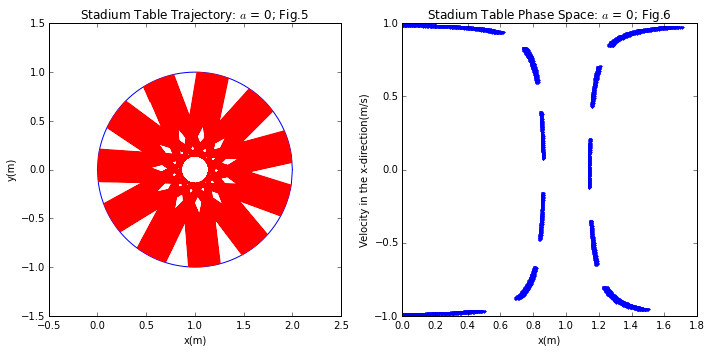

In [4]:
alph = 0
r = 1
Xtest0,Ytest0,V_x0,xy00 = billiards(1,math.pi/4,1.2,0,r,alph)
yup,ydown,x = stadiumtable(r,alph,order=1)

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #(ax1, ax2)
ax1.plot(x,yup,"b")
ax1.plot(x,ydown,"b")
ax1.plot(Xtest0,Ytest0,"r")
ax1.set_xlim(-0.5,2.5)
ax1.set_ylim(-1.5,1.5)
ax1.set_ylabel("y(m)")
ax1.set_xlabel("x(m)")
ax1.set_aspect(1.0)

ax2.plot(xy00,V_x0,".")
ax2.set_ylabel("Velocity in the x-direction(m/s)")
ax2.set_xlabel("x(m)")

ax1.set_title("Stadium Table Trajectory: $a$ = 0; Fig.5")
ax2.set_title("Stadium Table Phase Space: $a$ = 0; Fig.6")
plt.tight_layout()

The trajectory of a billiard's ball on a stadium table with an $\alpha$ = 0 m is shown in Fig.5, and the phase space plot of this same system is shown in Fig.6. The blue line on Fig.5 represent the borders of the stadium table and the red lines represent the path of the billiard's ball relative to the x- and y-coordinates. Fig.6 represents the phase space of $v_x$ vs. $x$ when $y=0$. We can see that both the trajectory and phase space plots follow a pattern, such as an oscillation within the phase space plot about the center of the table.

C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in sqrt


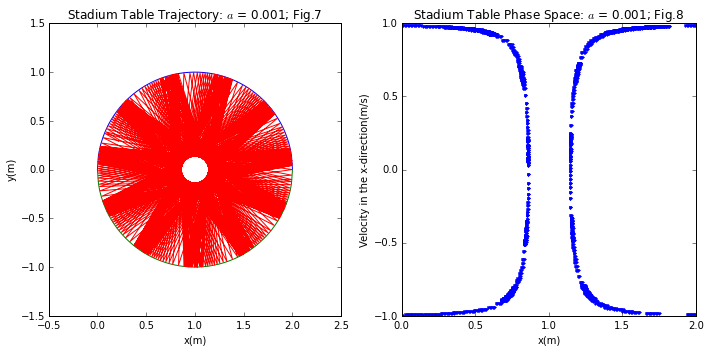

In [5]:
alph1 = 0.001
r = 1
Xtest1,Ytest1,V_x1,xy01 = billiards(1,math.pi/4,1.2,0,r,alph1)
yup,ydown,x = stadiumtable(r,alph1,order=1)

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #(ax1, ax2)
ax1.plot(x,yup)
ax1.plot(x,ydown)
ax1.plot(Xtest1,Ytest1)
ax1.set_xlim(-0.5,2.5)
ax1.set_ylim(-1.5,1.5)
ax1.set_ylabel("y(m)")
ax1.set_xlabel("x(m)")
ax1.set_aspect(1.0)

ax2.plot(xy01,V_x1,".")
ax2.set_ylabel("Velocity in the x-direction(m/s)")
ax2.set_xlabel("x(m)")
ax1.set_title("Stadium Table Trajectory: $a$ = 0.001; Fig.7")
ax2.set_title("Stadium Table Phase Space: $a$ = 0.001; Fig.8")
plt.tight_layout()

Fig.7 is the trajectory on a stadium table with an  $\alpha$ = 0.001 m. This is similar Fig.5 but ball's path has been changed, there is still a change in the pattern toward the edges but the ball still orbits around the center of the table. Fig. 8 is a phase space plot for the ball on the stadium table with the $\alpha$ being 0.001 m. It appear that the phase space plot still has a similar pattern although the points are more spread about the two halves.

C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in sqrt


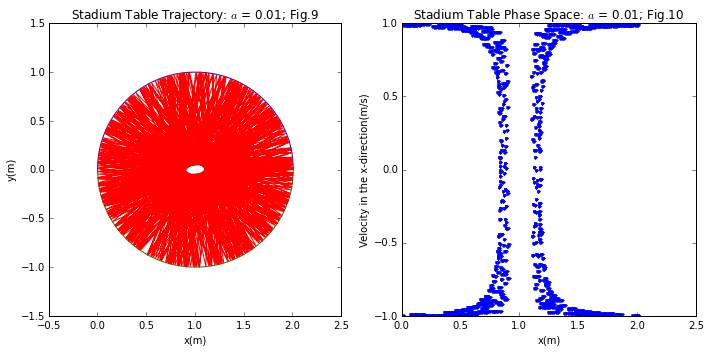

In [6]:
alph2 = 0.01
r = 1
Xtest2,Ytest2,V_x2,xy02 = billiards(1,math.pi/4,1.2,0,r,alph2)
yup,ydown,x = stadiumtable(r,alph2,order=1)

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #(ax1, ax2)
ax1.plot(x,yup)
ax1.plot(x,ydown)
ax1.plot(Xtest2,Ytest2)
ax1.set_xlim(-0.5,2.5)
ax1.set_ylim(-1.5,1.5)
ax1.set_ylabel("y(m)")
ax1.set_xlabel("x(m)")
ax1.set_aspect(1.0)

ax2.plot(xy02,V_x2,".")
ax2.set_ylabel("Velocity in the x-direction(m/s)")
ax2.set_xlabel("x(m)")

ax1.set_title("Stadium Table Trajectory: $a$ = 0.01; Fig.9")
ax2.set_title("Stadium Table Phase Space: $a$ = 0.01; Fig.10")
plt.tight_layout()

In Fig.9 the trajectory starts to change drastically for the stadium table with $\alpha$ = 0. There is still a portion in the center where the ball never crosses, yet the edges appear to follow no pattern. Fig.10 is the phase space for $\alpha$ = 0.01, there is a much less of symmetry but follows a similar layout. 

C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in sqrt


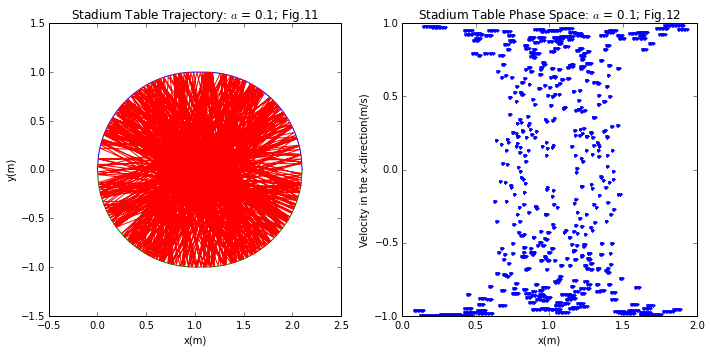

In [7]:
alph3 = 0.1
r = 1
Xtest3,Ytest3,V_x3,xy03 = billiards(1,math.pi/4,1.2,0,r,alph3)
yup,ydown,x = stadiumtable(r,alph3,order=1)

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #(ax1, ax2)
ax1.plot(x,yup)
ax1.plot(x,ydown)
ax1.plot(Xtest3,Ytest3)
ax1.set_ylabel("y(m)")
ax1.set_xlabel("x(m)")
ax1.set_aspect(1.0)

ax2.plot(xy03,V_x3,".")
ax2.set_ylabel("Velocity in the x-direction(m/s)")
ax2.set_xlabel("x(m)")

ax1.set_title("Stadium Table Trajectory: $a$ = 0.1; Fig.11")
ax2.set_title("Stadium Table Phase Space: $a$ = 0.1; Fig.12")
plt.tight_layout()

Fig.11, trajectory of $\alpha$ = 0.1, no longer has an area where the ball does not cross, and there is no longer any pattern in the path of the ball. In Fig.12 the symmetry is nearly gone and there the states seem to be distributed between the two "curves" on either side of the plot.

C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: RuntimeWarning: invalid value encountered in sqrt


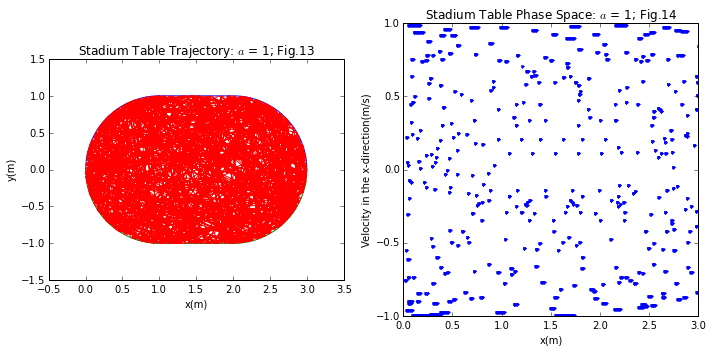

In [8]:
alph4 = 1
r = 1
Xtest4,Ytest4,V_x4,xy04 = billiards(1,math.pi/4,1.2,0,r,alph4)
yup,ydown,x = stadiumtable(r,alph4,order=1)

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #(ax1, ax2)
ax1.plot(x,yup)
ax1.plot(x,ydown)
ax1.plot(Xtest4,Ytest4)
ax1.set_ylabel("y(m)")
ax1.set_xlabel("x(m)")
ax1.set_aspect(1.0)

ax2.plot(xy04,V_x4,".")
ax2.set_ylabel("Velocity in the x-direction(m/s)")
ax2.set_xlabel("x(m)")

ax1.set_title("Stadium Table Trajectory: $a$ = 1; Fig.13")
ax2.set_title("Stadium Table Phase Space: $a$ = 1; Fig.14")
plt.tight_layout()

Fig.13 now shows that with $\alpha$ = 1 there is no longer any pattern and the trajectory of the ball. The states are spread across the entire phase space with no symmetry or pattern.

C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: RuntimeWarning: invalid value encountered in sqrt


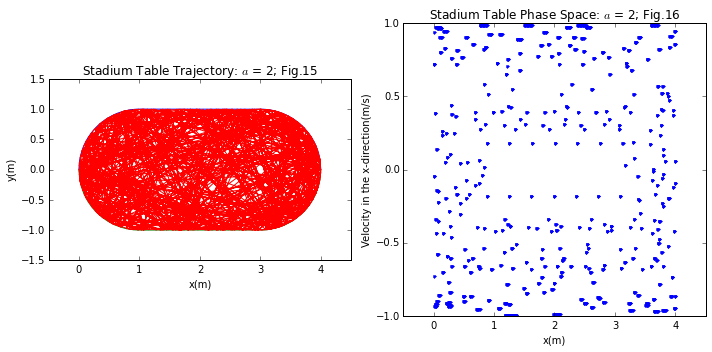

In [9]:
alph5 = 2
r = 1
Xtest5,Ytest5,V_x5,xy05 = billiards(1,math.pi/4,1.2,0,r,alph5)
yup,ydown,x = stadiumtable(r,alph5,order=1)

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #(ax1, ax2)
ax1.plot(x,yup)
ax1.plot(x,ydown)
ax1.plot(Xtest5,Ytest5)
ax1.set_ylabel("y(m)")
ax1.set_xlabel("x(m)")
ax1.set_xlim(-0.5,4.5)
ax1.set_aspect(1.0)

ax2.plot(xy05,V_x5,".")
ax2.set_ylabel("Velocity in the x-direction(m/s)")
ax2.set_xlabel("x(m)")
ax2.set_xlim(-0.5,4.5)

ax1.set_title("Stadium Table Trajectory: $a$ = 2; Fig.15")
ax2.set_title("Stadium Table Phase Space: $a$ = 2; Fig.16")
plt.tight_layout()

Fig.15, the trajectory of a ball on a stadium table with $\alpha$ of two meters, is very similar to that in Fig. 13. The only difference is that there is more space in the middle of the table that is not touched. The phase space plot, Fig.16, shows a graph similar to that for the $\alpha$ = 1. The states are dispersed evenly through the phase space, although there is a large gap in the middle of the plot. With the information gathered from Fig.5 until this point, we have half of the data needed to see how the Lyapunov exponent is affected by the change in alpha of the stadium table. For each of the tables above, a second set of data will be taken for a ball starting $10^{-5}$ meters away and find the distance between each point at a certain time, $t$. Then plotting the distance over time we obtain the divergence of the trajectories.

### Stadium Table - Two Trajectory Divergence

C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in sqrt


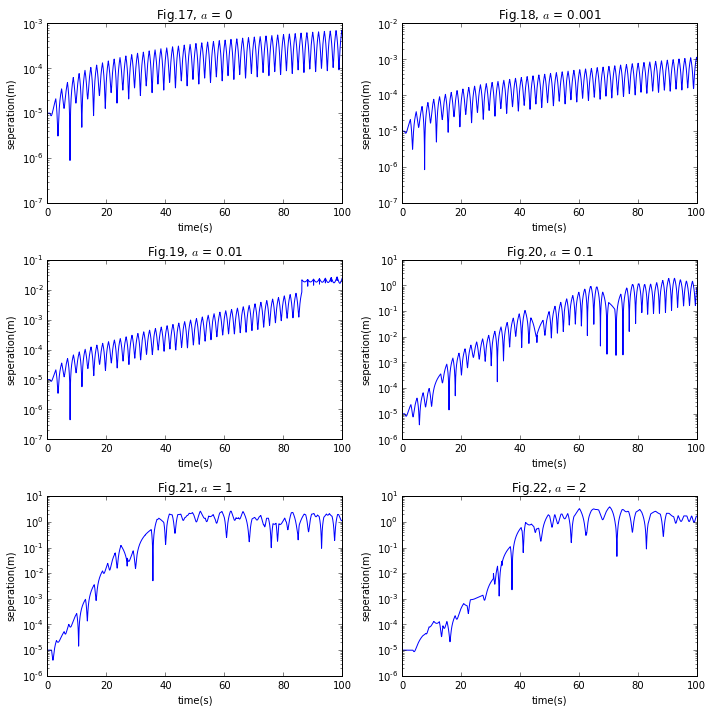

In [10]:
Xtest0a,Ytest0a,V_x0a,xy00a = billiards(1,math.pi/4,1.20001,0,r,alph)
Xtest1a,Ytest1a,V_x1a,xy01a = billiards(1,math.pi/4,1.20001,0,r,alph1)
Xtest2a,Ytest2a,V_x2a,xy02a = billiards(1,math.pi/4,1.20001,0,r,alph2)
Xtest3a,Ytest3a,V_x3a,xy03a = billiards(1,math.pi/4,1.20001,0,r,alph3)
Xtest4a,Ytest4a,V_x4a,xy04a = billiards(1,math.pi/4,1.20001,0,r,alph4)
Xtest5a,Ytest5a,V_x5a,xy05a = billiards(1,math.pi/4,1.20001,0,r,alph5)

d0,t0 = divergence(Xtest0a,Xtest0,Ytest0a,Ytest0)
d1,t1 = divergence(Xtest1a,Xtest1,Ytest1a,Ytest1)
d2,t2 = divergence(Xtest2a,Xtest2,Ytest2a,Ytest2)
d3,t3 = divergence(Xtest3a,Xtest3,Ytest3a,Ytest3)
d4,t4 = divergence(Xtest4a,Xtest4,Ytest4a,Ytest4)
d5,t5 = divergence(Xtest5a,Xtest5,Ytest5a,Ytest5)

fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

ax1.semilogy(t0,d0)
ax1.set_ylabel("seperation(m)")
ax1.set_xlabel("time(s)")
ax1.set_title("Fig.17, $a$ = 0")

ax2.semilogy(t1,d1)
ax2.set_ylabel("seperation(m)")
ax2.set_xlabel("time(s)")
ax2.set_title("Fig.18, $a$ = 0.001")

ax3.semilogy(t2,d2)
ax3.set_ylabel("seperation(m)")
ax3.set_xlabel("time(s)")
ax3.set_title("Fig.19, $a$ = 0.01")

ax4.semilogy(t3,d3)
ax4.set_ylabel("seperation(m)")
ax4.set_xlabel("time(s)")
ax4.set_title("Fig.20, $a$ = 0.1")

ax5.semilogy(t4,d4)
ax5.set_ylabel("seperation(m)")
ax5.set_xlabel("time(s)")
ax5.set_title("Fig.21, $a$ = 1")

ax6.semilogy(t5,d5)
ax6.set_ylabel("seperation(m)")
ax6.set_xlabel("time(s)")
ax6.set_title("Fig.22, $a$ = 2")

plt.tight_layout()

The figures above show, in order of left to right then top to bottom (Fig.17 - Fig.22), how the path divergence between two balls is affected by the increase in $\alpha$ of a stadium table. The y-axis has been scaled to a logarithmic scale, and is the distance between two balls, in meters. The x-axis is not scaled to a logarithmic scale and is the time, in seconds, that the distance between the two balls is measured at. Fig.17 shows the divergence of the circular table, it starts with an initial distance of $10^{-5}$ m, as do all the rest of the cases. There is one minimum peak that puts them approximately $10^{-6}$ m between each ball and over time it approaches $10^{-3}$ m. Fig.18 is very similar to Fig.17 with the one exception being the maximum for the distance between the two points approaching a little over $10^{-3}$ m. In Fig.19 there is some change in the oscillations and the smoothness of the slope, as well as a maximum distance of $10^{-2}$ m. It is important to notice that for these first three plots the slope on the logarithmic scale is almost linear. Now, when looking at Fig.20 the oscillations become messier and the slope becomes greater than the first three graphs, approaching a total distance of about a meter. Both Fig.21 and Fig.22 have a much steeper slope and have very inconsistent oscillations. Both approach maximum distances greater than one meter. 

These graphs were created using the data from the trajectory plots above, along with another set of data where the only initial condition being altered is the initial x-position with is $10^{-5}$ meters away from the first ball. Over time this initial condition alteration causes the graphs above that can be explained using the Lyapunov exponent. The trajectory of a billiard's ball can also be looked at on different kinds of tables such as an elliptical table.

### Elliptical Table

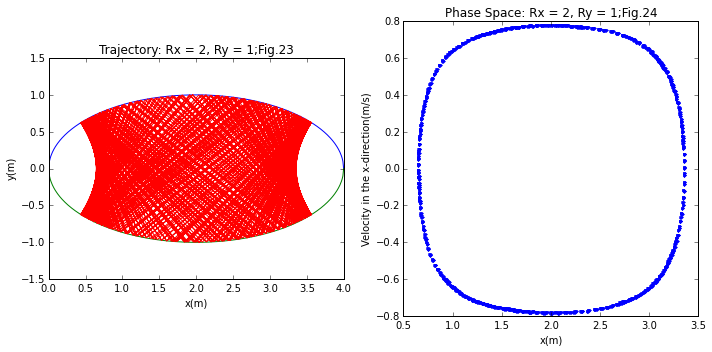

In [12]:
Rx = 2
Ry = 1
Xtest10,Ytest10,V_x10,xy010 = billiards(1,math.pi/4,1.2,0,Rx,Ry,order=2)
yup10,ydown10,x10 = stadiumtable(Rx,Ry,order=2)

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #(ax1, ax2)
ax1.plot(x10,yup10)
ax1.plot(x10,ydown10)
ax1.plot(Xtest10,Ytest10)
ax1.set_ylabel("y(m)")
ax1.set_xlabel("x(m)")
ax1.set_aspect(1.0)

ax2.plot(xy010,V_x10,".")
ax2.set_ylabel("Velocity in the x-direction(m/s)")
ax2.set_xlabel("x(m)")

ax1.set_title("Trajectory: Rx = 2, Ry = 1;Fig.23")
ax2.set_title("Phase Space: Rx = 2, Ry = 1;Fig.24")
plt.tight_layout()

Using the same numerical method to plot the trajectory of a ball on a stadium table, the trajectory of a billiard's ball can be modelled for an elliptical table. Fig.23, is the model of that trajectory, where the table has a half-width of one meter and a half-length of two meters. The ball has the same initial conditions as that of the different stadium tables. It is important to notice that there are two empty portions on either end of the table along with a pattern in the middle of the table. Fig.24, is the plot of the phase space for the elliptical table and it was obtained using the same method that produced the phase space plot for the stadium tables. The general shape of phase space plot is symmetric about the $x$ = 2 m, Where the corners of the plot are dense and the sides are thin.

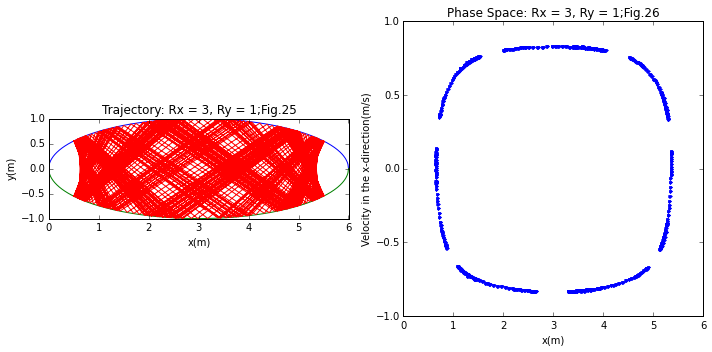

In [13]:
Rx1 = 3
Ry1 = 1

Xtest11,Ytest11,V_x11,xy011 = billiards(1,math.pi/4,1.2,0,Rx1,Ry1,order=2)
yup11,ydown11,x11 = stadiumtable(Rx1,Ry1,order=2)

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #(ax1, ax2)

ax1.plot(x11,yup11)
ax1.plot(x11,ydown11)
ax1.plot(Xtest11,Ytest11)
ax1.set_ylabel("y(m)")
ax1.set_xlabel("x(m)")
ax1.set_aspect(1.0)

ax2.plot(xy011,V_x11,".")
ax2.set_ylabel("Velocity in the x-direction(m/s)")
ax2.set_xlabel("x(m)")

ax1.set_title("Trajectory: Rx = 3, Ry = 1;Fig.25")
ax2.set_title("Phase Space: Rx = 3, Ry = 1;Fig.26")
plt.tight_layout()

Fig.25 is very similar to Fig.23 because there is voids on either side of the elliptical table, and, once again, there is a plaid like pattern throughout the table. Fig.26 is also very similar for that of the elliptical table used earlier. The states on the plot are almost perfectly symmetrical about $x$ = 3 m. Yet, this is for an elliptical table of different dimensions. With the trajectories from Fig.23 and Fig.25 we can go through the same process used for the stadium table to plot the divergence of the two elliptical tables and observe how the table shapes vary the Lyapunov exponent.

### Elliptical Table - Two Trajectory Divergence


C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in sqrt
C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: RuntimeWarning: invalid value encountered in sqrt


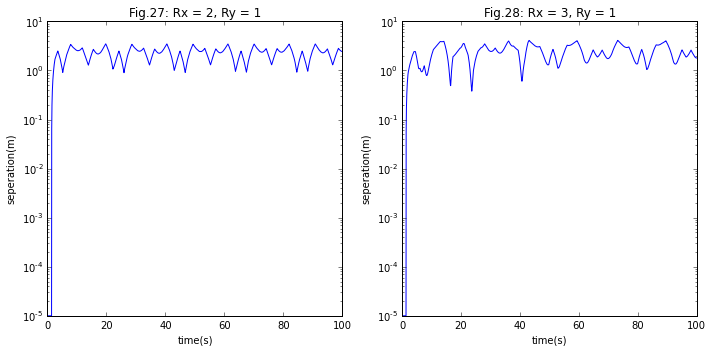

In [14]:
Xtest10a,Ytest10a,V_x10a,xy010a = billiards(1,math.pi/4,1.20001,0,Rx,Ry)
Xtest11a,Ytest11a,V_x11a,xy011a = billiards(1,math.pi/4,1.20001,0,Rx1,Ry1)

d0,t0 = divergence(Xtest10a,Xtest10,Ytest10a,Ytest10)
d1,t1 = divergence(Xtest11a,Xtest11,Ytest11a,Ytest11)

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.semilogy(t0,d0)
ax1.set_ylabel("seperation(m)")
ax1.set_xlabel("time(s)")
ax1.set_title("Fig.27: Rx = 2, Ry = 1")

ax2.semilogy(t1,d1)
ax2.set_ylabel("seperation(m)")
ax2.set_xlabel("time(s)")
ax2.set_title("Fig.28: Rx = 3, Ry = 1")

plt.tight_layout()

The final two figures to be analyzed are the divergences of two balls on two different shaped elliptical tables. It is important to notice the logarithmic scale for the y-axis that measures the distance between the two balls. Above in Fig.27, we can see that the separation immediately jumps to approximately one meter. It is important to note that once it reaches this one meter the average distance is constant and the oscillations follow a specific pattern. Fig.28 is similar to Fig.27 because it too immediately jumps to a separation of one meter, but when it gets there it takes a few oscillations to reach a steady pattern.

## Analysis

Using what we obtained from our results it we conclude that the shape of the table determines the whether a system is chaotic or not. It appears that with the circular table there is no chaos but as the $\alpha$ for the stadium table increases the system becomes more and more chaotic. We can determine this using the divergence plots and the phase space plots. One assumption we can make is that the symmetry of the phase space plot correlates to the amount of chaos in a system. It is also appear ant that as the $\alpha$ of the stadium table increases, Lyapunov exponent of the table also increases concluding our assumption that as the $\alpha$ increases so does the chaos in the system. This is shown by the rate of increase of the divergence between the two balls on the table. 

Another observation we can make is that, similar to the center of the circular table, there is a region of the elliptical table that is immune to contact with the ball. This region brings up the question of whether not this system is chaotic or not. Then by observing the phase space plots and divergence plots we can conclude that systems like the circular table and elliptical table are not as chaotic as systems that do not have very high symmetry, such as the stadium table.

## Scientific Summary
The scientific problem we solved was the Billiard problem. This is a problem where by modeling the trajectory and other properties of the balls trajectory we can determine the chaos of the system. We completed this goal because we were able to use a phase space plot, trajectory plot, and a two ball divergence to observe characteristics of a system due to different tables. We discovered that the shape of the table can determine whether or not a system will be chaotic or not. This means that you can have a table for instance that is circular and this is a non-chaotic system where if you have a stadium table with $\alpha > 0$ it will be chaotic. This is important because it allows us to greater understand what a chaotic system is and how it relates to everyday life.

## Personal Summary


Personally completing this project was extremely satisfying. Throughout solving this problems there were many issues that arose and being able to use what I learned in this class along with skills form other physics and math classes, which made me feel very accomplished. New skills I learned consist of learning how to take my mathematical skills and apply them to real world situations. Another is how to determine chaos in a dynamical which will be useful because I want to work with different dynamical systems in the future.


## References

Phase space. Encyclopedia of Mathematics. URL:       http://www.encyclopediaofmath.org/index.php?title=Phase_space&oldid=32015

Giordano, Nicholas J., and Hisao Nakanishi. Computational Physics. 1st ed.        Dorling Kindersley, 1997.

Bishop, Robert. “Chaos.” Stanford Encyclopedia of Philosophy, Stanford            University, 13 Oct. 2015, plato.stanford.edu/entries/chaos/.

“Lyapunov Characteristic Exponent.” From Wolfram MathWorld, mathworld.wolfram.com/LyapunovCharacteristicExponent.html.

[1] CalculatorSoup, LLC. “Stadium Calculator.” CalculatorSoup, www.calculatorsoup.com/calculators/geometry-plane/stadium.php.

[2] “Ellipse? Circle? How Are They Related?” Application of Maths to Swimming, mathsisinteresting.blogspot.com/2008/08/ellipse-         circle-how-are-they-related.html.

[3] “JCCC MATH/PHYS 191.” Vector Projection - JCCC MATH/PHYS 191, jccc-mpg.wikidot.com/vector-projection.

[4] “Reflection (Physics).” Wikipedia, Wikimedia Foundation, 9 May 2018, en.wikipedia.org/wiki/Reflection_(physics).